            Sales
Date             
1949-01-01    112
1949-01-01    118
1949-03-01    132
1949-04-01    129
1949-04-01    121


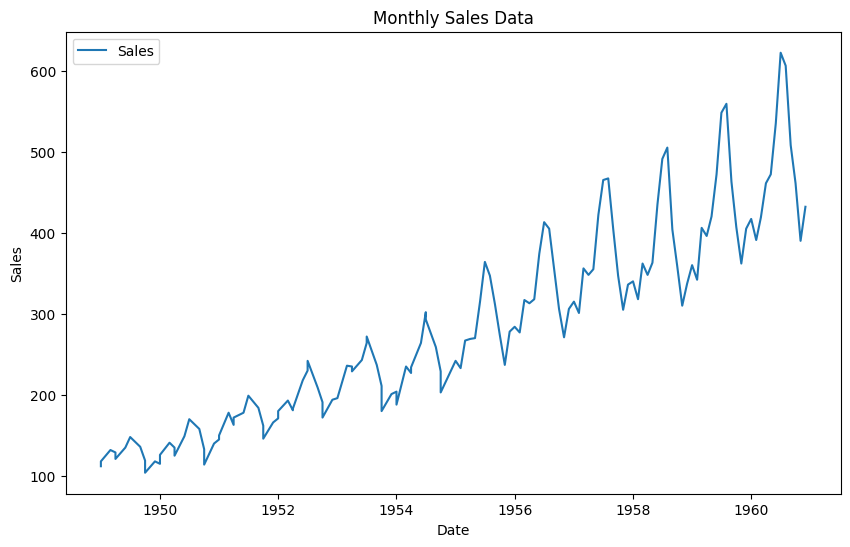

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.datasets import get_rdataset

# Load sample sales data
dataset = get_rdataset('AirPassengers')
data = dataset.data

# Extract year and month from the time column
data['Year'] = data['time'].astype(int)
data['Month'] = ((data['time'] - data['Year']) * 12 + 1).astype(int)
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))

# Set the date as the index
data.set_index('Date', inplace=True)
data = data.drop(columns=['time', 'Year', 'Month'])

# Rename the column
data.columns = ['Sales']

# Display the first few rows of the dataset
print(data.head())

# Plot the sales data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Sales')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



            Sales
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
Sales    0
dtype: int64


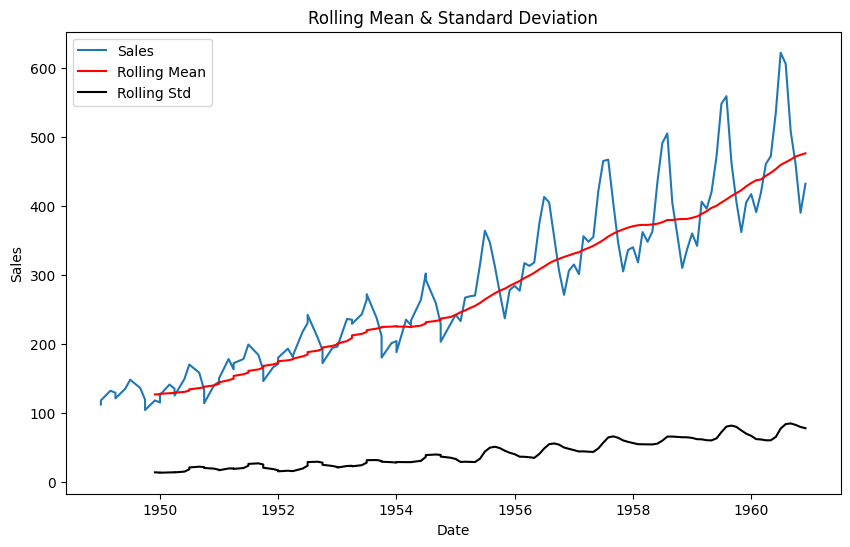

In [ ]:
# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Plot the rolling mean and standard deviation
rolling_mean = data.rolling(window=12).mean()
rolling_std = data.rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(data, label='Sales')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


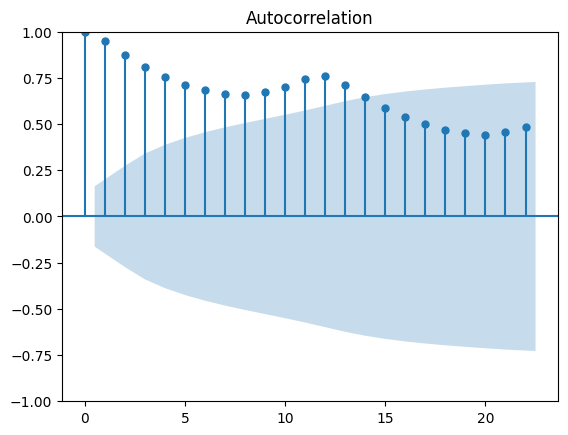

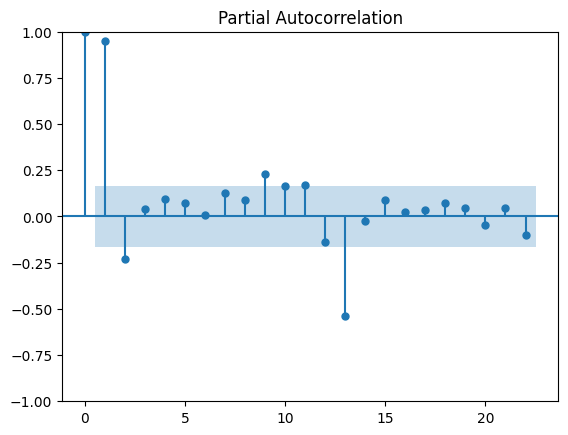

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Mon, 08 Jul 2024   AIC                           1390.135
Time:                        16:47:38   BIC                           1407.912
Sample:                             0   HQIC                          1397.358
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


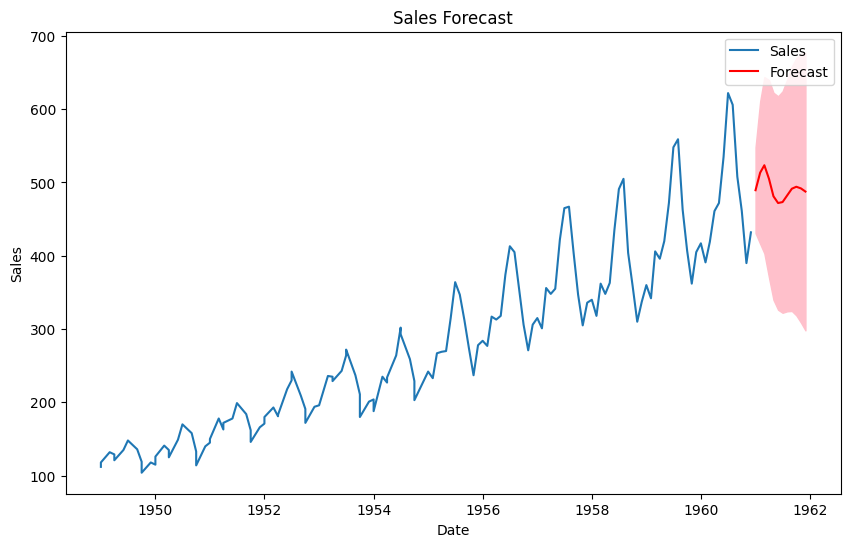

In [ ]:
# Plot ACF and PACF
plot_acf(data)
plot_pacf(data)
plt.show()

# Fit ARIMA model
model = ARIMA(data, order=(5, 1, 0))  # p, d, q values determined from ACF and PACF plots
model_fit = model.fit()
print(model_fit.summary())

# Forecast future sales
forecast_steps = 12  # Forecast for the next 12 months
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()

# Create a DataFrame to hold the forecasted values
forecast_df.index = [data.index[-1] + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data, label='Sales')
plt.plot(forecast_df['mean'], color='red', label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


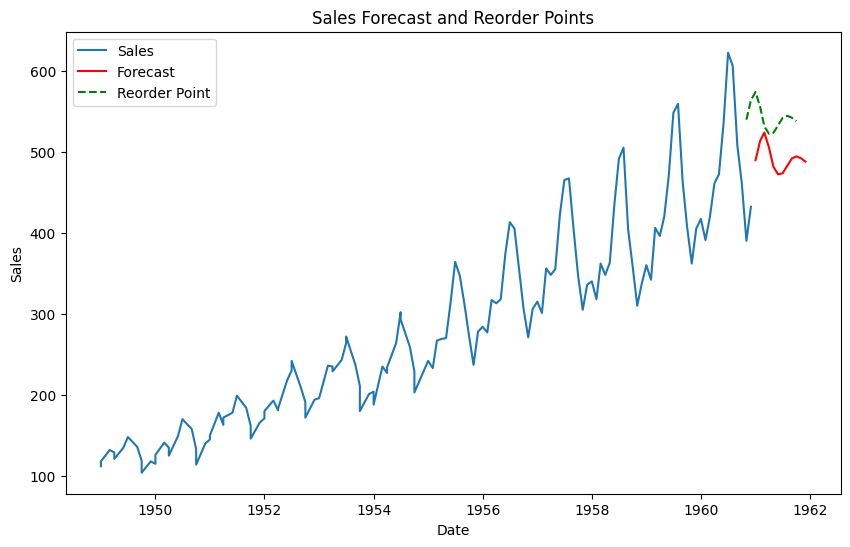

In [ ]:
# Define reorder parameters
lead_time = 2  # in months
safety_stock = 50  # units

# Generate reorder recommendations
data['Forecast'] = np.nan
forecast_df = forecast_df[['mean']].rename(columns={'mean': 'Forecast'})
data = pd.concat([data, forecast_df], axis=0)

data['Reorder Point'] = data['Forecast'].shift(-lead_time) + safety_stock

# Plot the reorder points
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Sales')
plt.plot(data['Forecast'], color='red', label='Forecast')
plt.plot(data['Reorder Point'], color='green', linestyle='dashed', label='Reorder Point')
plt.title('Sales Forecast and Reorder Points')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


